## Task 1: Prediction using Supervised ML 
## By : Sachin Ghanteppagol
#### Prediction using Supervised ML
#### (Level - Beginner)
#### ● Predict the percentage of an student based on the no. of study hours.
#### ● This is a simple linear regression task as it involves just 2 variables.
#### ● You can use R, Python, SAS Enterprise Miner or any other tool
#### ● Data can be found at http://bit.ly/w-data
#### ● What will be predicted score if a student studies for 9.25 hrs/ day? 

### Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data from the URL

In [12]:
url=("http://bit.ly/w-data")
data_load=pd.read_csv(url)
data_load.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
data_load.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Since the dataset is small we could see the better picture of corelation between the values.

### Plotting using the distribution of Scores

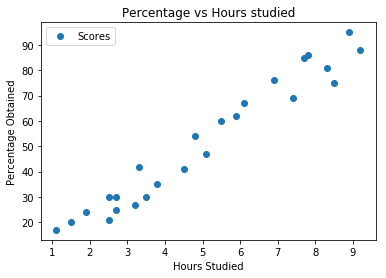

In [3]:
data_load.plot(x="Hours",y="Scores",style='o')
plt.title("Percentage vs Hours studied")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Obtained")
plt.show()

#### There is a positive corelation between no. of hours studeid and scores obtained.

### Next step is to divide the data into "attributes" and "labels". 
#### Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 
#### We want to predict the percentage score depending upon the hours studied. 
#### Attribute set will consist of the "Hours" column
#### Label will be the "Score" column. 

In [4]:
x=data_load.iloc[:,:-1]
y=data_load.iloc[:,1]


#### Splitting of data into the training and test sets is very important as in this time we will be using Scikit Learn's builtin method of train_test_split()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

### Training the algorithm

In [17]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    #Creating a object of Linear Regression
regressor.fit(x_train, y_train)   
  
print("Training ... Completed !.") 

Training ... Completed !.


### Plotting test data using the previously trained test data

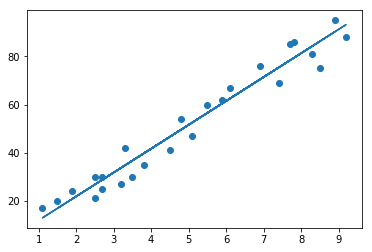

In [18]:
line = regressor.coef_*x + regressor.intercept_  
plt.scatter(x, y)  
plt.plot(x, line);  
plt.show()  

### Predicting the scores for the model is the next important step towards knowing our model, as we proceed as follows,

In [8]:
print(x_test)   
y_pred = regressor.predict(x_test)  

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


### Comparing the actual versus predicted model to understand our model fitting,

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df  

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [21]:
hours = [[9.25]]
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


Happy Learning